<a href="https://colab.research.google.com/github/CeskKim/AI-Study/blob/main/Model/Base/prophet_coin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#######################################################
# pip install
#######################################################
!pip install pyupbit
!pip install pykrx
!pip install Prophet
!pip install currencyconverter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 13.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.6/563.6 KB 10.1 MB/s eta 0:00:00


In [2]:
#######################################################
# import set
#######################################################
import pyupbit
from pykrx import stock
from prophet import Prophet

In [4]:
#######################################################
# 소스 데이터
# 소스 : 업비트, 기준 : 시간, 기본 :200개, count() : 현재 일자 대비 수치
#######################################################
cur = "KRW"
name = "SOL"
coin_name = f"{cur}-{name}"
upbit_df = pyupbit.get_ohlcv(coin_name, interval = "minute60",count = 10)
upbit_df = upbit_df.reset_index()
upbit_df['ds'] = upbit_df['index']
upbit_df['y'] = upbit_df['close']
upbit_data = upbit_df[['ds', 'y']]

In [7]:
#######################################################
# 튜닝
# 기본 : additive, multipleactive : 불규칙성 내역에 적용
# 참고 사이트 : https://study-by-security.tistory.com/17
#######################################################
ph_model = Prophet(
    seasonality_mode = "multiplicative",
    changepoint_prior_scale = 0.5,
    changepoint_range = 0.9
)
ph_model.fit(upbit_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4k2hf37/b3ax83vn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa4k2hf37/k2xxhq4t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87143', 'data', 'file=/tmp/tmpa4k2hf37/b3ax83vn.json', 'init=/tmp/tmpa4k2hf37/k2xxhq4t.json', 'output', 'file=/tmp/tmpa4k2hf37/prophet_modelxugjy8kx/prophet_model-20230226103647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:36:47 - cmdstanpy - INFO - Chain [1] start processing
INF

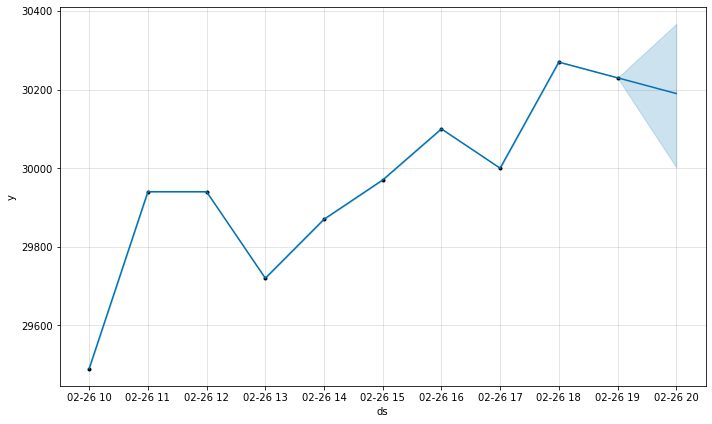

In [13]:
periods = 1 #시간 단위
ph_future = ph_model.make_future_dataframe(periods=1, freq='H')
ph_forecast = ph_model.predict(ph_future)
ph_fig = ph_model.plot(ph_forecast)

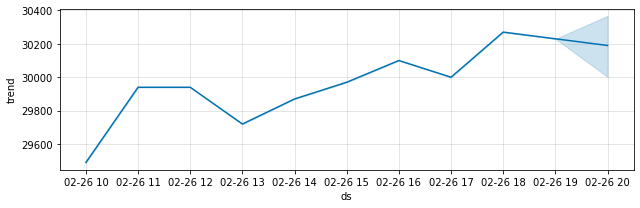

In [14]:
#######################################################
# 트렌드 예측값
#######################################################
ph_fig = ph_model.plot_components(ph_forecast)

In [17]:
#######################################################
# 현재가격, periods 시간이후 예측 가격
#######################################################
from currency_converter import CurrencyConverter
cur = CurrencyConverter('http://www.ecb.europa.eu/stats/eurofxref/eurofxref.zip')
upbit_now_krw = pyupbit.get_current_price(coin_name)
upbit_aft_krw = ph_forecast['yhat'].values[-1]

# 환율 변환
upbit_now_usd = cur.convert(upbit_now_krw, 'KRW', 'USD')
upbit_aft_usd = cur.convert(upbit_aft_krw, 'KRW', 'USD')

print(f"현재{name} 가격(krw) : {upbit_now_krw}, {periods}시간 이후{name} 가격(krw) : {upbit_aft_krw}")
print(f"현재{name} 가격(usd) : {upbit_now_usd}, {periods}시간 이후{name} 가격(usd) : {upbit_aft_usd}")

현재SOL 가격(krw) : 30200, 1시간 이후SOL 가격(krw) : 30190.00648
현재SOL 가격(usd) : 23.011721622284053, 1시간 이후SOL 가격(usd) : 23.00410678452688
